In [1]:
# Kennedi Todd
# August 8, 2024
# Chapter 13: Tree-based Methods
# Use a random forest to predict the outcome of a user clicking on an ad

# libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# read data
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [2]:
# remove column
del df['Ad Topic Line']
del df['Timestamp']

# one-hot encoding
df = pd.get_dummies(df, columns = ['Country','City'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Country_Afghanistan,Country_Albania,Country_Algeria,Country_American Samoa,...,City_Wintersfort,City_Wongland,City_Wrightburgh,City_Wrightview,City_Yangside,City_Youngburgh,City_Youngfort,City_Yuton,City_Zacharystad,City_Zacharyton
0,68.95,35,61833.90,256.09,0,0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,80.23,31,68441.85,193.77,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,69.47,26,59785.94,236.50,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,74.15,29,54806.18,245.89,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,68.37,35,73889.99,225.58,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


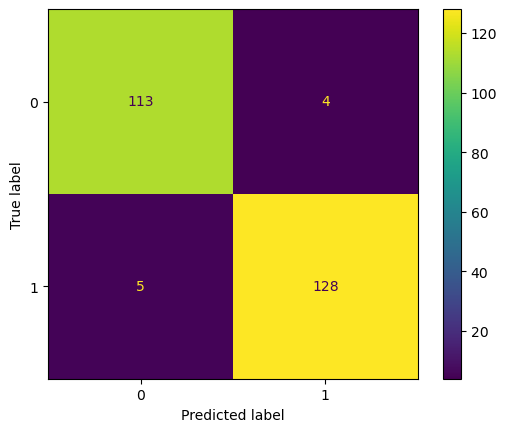

In [3]:
# set X and y variables
X = df.drop('Clicked on Ad', axis = 1)
y = df['Clicked on Ad']

# split training/testing data 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, random_state = 10)

# assign model
model = RandomForestClassifier()

# fit data to model
model.fit(X_train, y_train)

# evaluate
model_predict = model.predict(X_test)
cf = confusion_matrix(y_test, model_predict)
cf_plot = ConfusionMatrixDisplay(cf)
cf_plot.plot()

In [4]:
print(classification_report(y_test, model_predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       117
           1       0.97      0.96      0.97       133

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

